# **Pandas**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)



> We'll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let's read the data (using **read_csv**), and take a look at the first 5 lines using the head method:



In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [ ]:
train.head(3)

In [ ]:
test.head(3)



> By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

 ```python pd.set_option('display.max_columns', 100)``` 
 
 ``` pd.set_option('display.max_rows', 100) ```

Recall that **each row corresponds to one client, an instance, and columns are features of this instance.**



In [ ]:
print('train-shape : ',train.shape,'Test Shape :',test.shape)



> From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using **columns**:



In [ ]:
print(train.columns)



> We can use the **info()** method to output some general information about the dataframe:



In [ ]:
print(train.info())



> With this same method, we can easily see if there are any **missing values**. Here, there are none because each column contains **2666 observations**, the same number of rows **we saw before with shape**.

We can change **the column type** with the **astype** method. Let's apply this method to the Churn feature to convert it into int64:



In [ ]:
train['Churn'] = train['Churn'].astype('int64') # transform False -> 0 || True -> 1
test['Churn'] = test['Churn'].astype('int64') 



> The **describe** method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.



In [ ]:
train.describe()



> In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.



In [ ]:
train.describe(include=['object', 'bool'])

For categorical (type object) and boolean (type bool) features we can use the value_counts method. Let's have a look at the distribution of Churn:

In [ ]:
train['Churn'].value_counts()

In [ ]:
test['Churn'].value_counts()

2850 users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass normalize=True to the value_counts function.

In [ ]:
train['Churn'].value_counts(normalize=True)

In [ ]:
test['Churn'].value_counts(normalize=True)

# **Visualisation**

In [ ]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'



## 1.   **Correlation Matrix**





> Let's look at the **correlations** among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.



First, we will use the method **corr()** on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

In [ ]:
# Drop non-numerical variables
numerical = list( set(train.columns) - 
                 set(['State','International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

In [ ]:
# Calculate and plot
corr_matrix = train[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:



> Let's look at the distribution of the number of calls to customer service using a count plot.Let's also pass the parameter hue=Churn that adds a categorical dimension to the plot:



In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=train);



> From the plot we notice that the churn rate increases significantly **after 4 or more calls to customer service**.



# **Modeling**

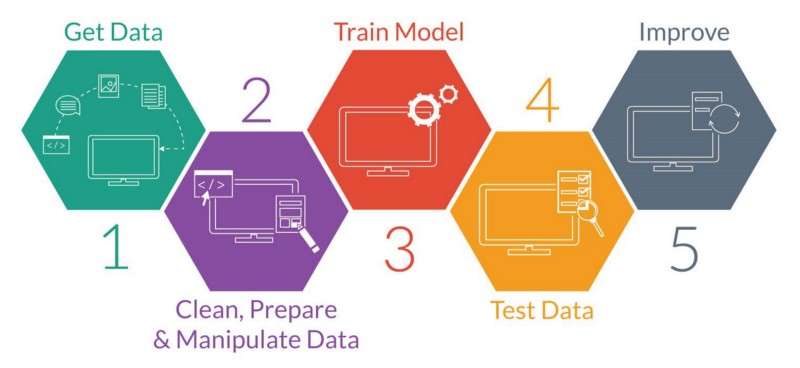



> Before we start Modeling , let's make some **transformation**



In [ ]:
train.head(3)

### **Label-Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Features_To_Transform = ['State','International plan','Voice mail plan']

In [ ]:
for feature in Features_To_Transform : 
  train[feature] = LE.fit_transform(train[feature])  # [A,B,C] - > [1,2,3] ->>> data - || A ->1  :: B ->2 
  test[feature] = LE.transform(test[feature])

In [ ]:
train.head(2)

### **Split the TrainData to Train and Validation**

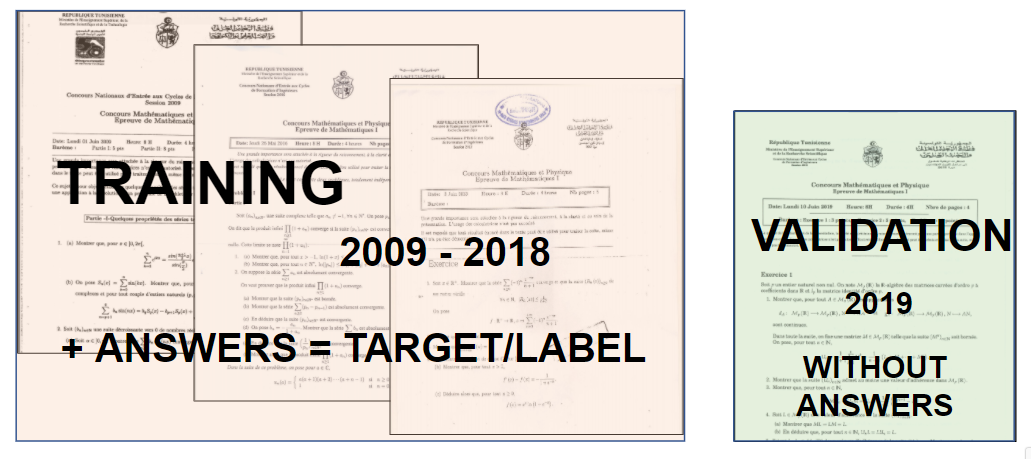

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# First Let's Drop the Target Feature from our Data  

target = train['Churn']
Train = train.drop('Churn',axis=1)

# Now let's split to train & Validation

X_train,X_valid,y_train,y_valid =train_test_split(Train,target,
                                stratify=target, # this make the split Balanced
                                test_size = 0.15, # it means that the size of validation is 0.15 * train size
                                random_state=42,  # to take each time the same train & validation | Randomness
                                )

### **Time to start Modeling Huh !?**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
dt = DecisionTreeClassifier(max_depth=4,random_state=42)

In [ ]:
%%time
# start training with ---fit---
rf.fit(X_train,y_train)

In [ ]:
%%time
dt.fit(X_train,y_train)

In [ ]:
# Let's validate our work

rf_Validation_prediction_with_Proba = rf.predict_proba(X_valid)[:,1]
dt_Validation_prediction_with_Proba = dt.predict_proba(X_valid)[:,1]

In [ ]:
# Let's get the  Performance Of our work --> Yess we will discover Classification Metrics :)

from sklearn.metrics import log_loss , f1_score , accuracy_score

In [ ]:
print('RandomForestClassifier Performance : ')
print()
print('accuracy (we want to maximize) :' , accuracy_score(y_valid,(rf_Validation_prediction_with_Proba>0.5)*1))
print('F1 score (we want to maximize) :' , f1_score(y_valid, (rf_Validation_prediction_with_Proba>0.5 )*1  )  )
print('Log Loss (we want to minimize) :' , log_loss(y_valid, rf_Validation_prediction_with_Proba ) )

In [ ]:
print('DecisionTreeClassifier Performance : ')
print()
print('accuracy :' , accuracy_score(y_valid,(dt_Validation_prediction_with_Proba>0.5)*1))
print('F1 score :' , f1_score(y_valid, (dt_Validation_prediction_with_Proba>0.5 )*1  )  )
print('Log Loss :' , log_loss(y_valid, dt_Validation_prediction_with_Proba ) )

## **TEST**

In [ ]:
test.head(2)

In [ ]:
# Lets get the Label from our test 
TEST_TARGET = test['Churn']
TEST = test.drop('Churn',axis=1)

In [ ]:
rf_prediction  = rf.predict_proba(TEST)[:,1]
dt_prediction  = dt.predict_proba(TEST)[:,1]

In [ ]:
print('RandomForestClassifier Performance ON TEST: ')
print()
print('accuracy :' , accuracy_score(TEST_TARGET,(rf_prediction>0.5)*1))
print('F1 score :' , f1_score(TEST_TARGET, (rf_prediction>0.5 )*1  )  )
print('Log Loss :' , log_loss(TEST_TARGET, rf_prediction ) )

In [ ]:
print('DecisionTreeClassifier Performance ON TEST: ')
print()
print('accuracy (we want to maximize ) :' , accuracy_score(TEST_TARGET,(dt_prediction>0.5)*1))
print('F1 score (we want to maximize ) :' , f1_score(TEST_TARGET, (dt_prediction>0.5 )*1  )  )
print('Log Loss (we want to minimize ) :' , log_loss(TEST_TARGET, dt_prediction ) )

# **Improvement**

In [ ]:
# let's get Feature Importance of random forest 

Feature_importance_DataFrame = pd.DataFrame()
Feature_importance_DataFrame['features'] = Train.columns
Feature_importance_DataFrame['importance'] = rf.feature_importances_
Feature_importance_DataFrame = Feature_importance_DataFrame.sort_values(by='importance',ascending=False)

In [ ]:
Feature_importance_DataFrame.head(5)

In [ ]:
Feature_importance_DataFrame.tail(5)

## **Feature-Engineering**

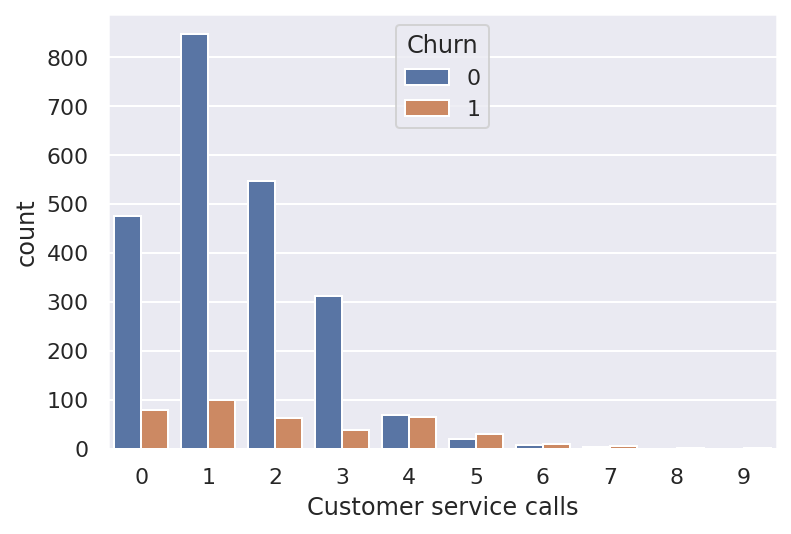

In [ ]:
# create feature over 4 calls 
Train['more_than_4_calls'] = Train['Customer service calls'].apply(lambda x : 1 if x >=4 else 0) 
TEST['more_than_4_calls'] = TEST['Customer service calls'].apply(lambda x : 1 if x >=4 else 0) 

In [ ]:
# Now let's split to train & Validation

X_train,X_valid,y_train,y_valid =train_test_split(Train,target,
                                stratify=target, # this make the split Balanced
                                test_size = 0.15, # it means that the size of validation is 0.15 * train size
                                random_state=42,  # to take each time the same train & validation | Randomness
                                )

In [ ]:
%%time
# start training with ---fit---
rf.fit(X_train,y_train) 

In [ ]:
# Let's validate our work

rf_Validation_prediction_with_Proba = rf.predict_proba(X_valid)[:,1]

In [ ]:
print('RandomForestClassifier Performance : ')
print()
print('accuracy :' , accuracy_score(y_valid,(rf_Validation_prediction_with_Proba>0.5)*1))
print('F1 score :' , f1_score(y_valid, (rf_Validation_prediction_with_Proba>0.5 )*1  )  )
print('Log Loss :' , log_loss(y_valid, rf_Validation_prediction_with_Proba ))

In [ ]:
# what about  TEST ?? 
rf_prediction  = rf.predict_proba(TEST)[:,1]

In [ ]:
print('RandomForestClassifier Performance ON TEST: ')
print()
print('accuracy :' , accuracy_score(TEST_TARGET,(rf_prediction>0.5)*1))
print('F1 score :' , f1_score(TEST_TARGET, (rf_prediction>0.5 )*1  )  )
print('Log Loss :' , log_loss(TEST_TARGET, rf_prediction ) )